# DuckDB 초기화

In [10]:
import os

DUCKDB_DB_FILE = "book_data.duckdb"

# 기존 DuckDB 데이터베이스 파일 삭제
if os.path.exists(DUCKDB_DB_FILE):
    os.remove(DUCKDB_DB_FILE)
    print(f"DuckDB 파일 '{DUCKDB_DB_FILE}' 삭제 완료.")
else:
    print(f"DuckDB 파일 '{DUCKDB_DB_FILE}'이 존재하지 않습니다. 초기화가 필요하지 않습니다.")

DuckDB 파일 'book_data.duckdb' 삭제 완료.


# Milvus 초기화

In [11]:
from pymilvus import connections, utility

MILVUS_COLLECTION_NAME = 'book_images_vectors'

try:
    # Milvus 연결
    connections.connect("default", host="localhost", port="19530")
    
    # 기존 Milvus 컬렉션 삭제
    if utility.has_collection(MILVUS_COLLECTION_NAME):
        utility.drop_collection(MILVUS_COLLECTION_NAME)
        print(f"Milvus 컬렉션 '{MILVUS_COLLECTION_NAME}' 삭제 완료.")
    else:
        print(f"Milvus 컬렉션 '{MILVUS_COLLECTION_NAME}'이 존재하지 않습니다. 초기화가 필요하지 않습니다.")
    
except Exception as e:
    print(f"Milvus 연결 또는 초기화 중 오류 발생: {e}")

Milvus 컬렉션 'book_images_vectors' 삭제 완료.


# DuckDB 데이터 확인

In [3]:
import duckdb

DUCKDB_DB_FILE = "book_data.duckdb"

try:
    con = duckdb.connect(database=DUCKDB_DB_FILE, read_only=True)
    
    # 1. 'book_metadata' 테이블의 모든 행 수 계산
    count_result = con.execute("SELECT COUNT(*) FROM book_metadata").fetchone()
    if count_result and count_result[0] > 0:
        print(f"DuckDB에 저장된 데이터 개수: {count_result[0]}개")
    else:
        print("DuckDB에 데이터가 없거나 테이블을 찾을 수 없습니다.")

    # 2. 데이터 샘플 5개 조회 (선택 사항)
    sample_data = con.execute("SELECT * FROM book_metadata LIMIT 5").df()
    print("\n--- DuckDB 데이터 샘플 ---")
    print(sample_data)

    con.close()

except Exception as e:
    print(f"DuckDB 데이터 확인 중 오류 발생: {e}")

DuckDB에 저장된 데이터 개수: 1000개

--- DuckDB 데이터 샘플 ---
                 id                                              title  \
0  90fa61229261140a                                 Tipping the Velvet   
1  6957f44c3847a760                                         Soumission   
2  a897fe39b1053632                               A Light in the Attic   
3  e72a5dfc7e9267b2  The Coming Woman: A Novel Based on the Life of...   
4  4165285e1663650f              Sapiens: A Brief History of Humankind   

                upc      price  \
0  90fa61229261140a  53.740002   
1  6957f44c3847a760  50.099998   
2  a897fe39b1053632  51.770000   
3  e72a5dfc7e9267b2  17.930000   
4  4165285e1663650f  54.230000   

                                                 url  \
0  http://books.toscrape.com/catalogue/tipping-th...   
1  http://books.toscrape.com/catalogue/soumission...   
2  http://books.toscrape.com/catalogue/a-light-in...   
3  http://books.toscrape.com/catalogue/the-coming...   
4  http://books.toscr

In [4]:
import duckdb

DUCKDB_DB_FILE = "book_data.duckdb"

try:
    con = duckdb.connect(database=DUCKDB_DB_FILE, read_only=True)
    
    print("--- 'book_metadata' 테이블 스키마 ---")
    
    # DESCRIBE 쿼리 실행
    schema_df = con.execute("DESCRIBE book_metadata;").fetchdf()
    print(schema_df)
    
    con.close()
    
except Exception as e:
    print(f"DuckDB 스키마 확인 중 오류 발생: {e}")

--- 'book_metadata' 테이블 스키마 ---
  column_name column_type null   key default extra
0          id     VARCHAR   NO   PRI    None  None
1       title     VARCHAR  YES  None    None  None
2         upc     VARCHAR  YES  None    None  None
3       price       FLOAT  YES  None    None  None
4         url     VARCHAR  YES  None    None  None
5  image_path     VARCHAR  YES  None    None  None


# Milvus 데이터 확인

In [15]:
from pymilvus import connections, Collection

MILVUS_COLLECTION_NAME = 'book_images_vectors'

try:
    # 1. Milvus 연결
    connections.connect("default", host="localhost", port="19530")
    
    # 2. 컬렉션 객체 가져오기
    collection = Collection(MILVUS_COLLECTION_NAME)
    
    # 3. 컬렉션에 저장된 엔티티 총 개수 확인
    milvus_count = collection.num_entities
    if milvus_count > 0:
        print(f"Milvus에 저장된 엔티티(벡터) 개수: {milvus_count}개")
    else:
        print("Milvus에 엔티티가 없거나 컬렉션을 찾을 수 없습니다.")

    # 4. 컬렉션 속성 출력 (선택 사항)
    print("\n--- Milvus 컬렉션 정보 ---")
    print("컬렉션 이름:", collection.name)
    print("스키마:", collection.schema)
    
except Exception as e:
    print(f"Milvus 데이터 확인 중 오류 발생: {e}")

Milvus에 저장된 엔티티(벡터) 개수: 1000개

--- Milvus 컬렉션 정보 ---
컬렉션 이름: book_images_vectors
스키마: {'auto_id': False, 'description': '책 이미지 벡터와 UPC', 'fields': [{'name': 'id', 'description': '', 'type': <DataType.VARCHAR: 21>, 'params': {'max_length': 128}, 'is_primary': True, 'auto_id': False}, {'name': 'vector', 'description': '', 'type': <DataType.FLOAT_VECTOR: 101>, 'params': {'dim': 512}}], 'enable_dynamic_field': False}


# DuckDB와 Milvus를 활용한 이미지 추출

--- Milvus에서 가져온 단일 엔티티 정보 ---
UPC: 67dea6c75d6a1075
벡터(일부): [0.009842436760663986, 0.017259133979678154, 0.002439022297039628, -0.04761349782347679, -0.022362379357218742] ... (총 512 차원)
✅ Milvus 데이터 확인 완료.

--- DuckDB에서 가져온 상세 메타데이터 ---
제목: Best of My Love (Fool's Gold #20)
가격: 27.40999984741211
이미지 경로: data/images/67dea6c75d6a1075.jpg


/home/evan/de_etl_book_tutorial/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/evan/de_etl_book_tutorial/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


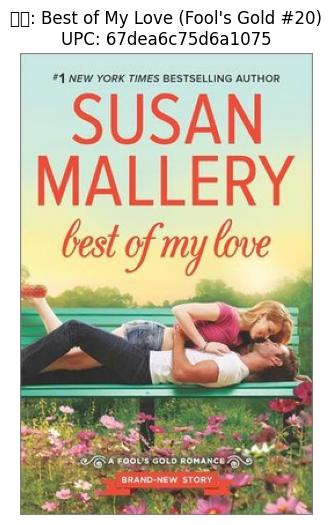

✅ 이미지 시각화 완료.


In [2]:
import os
import duckdb
import matplotlib.pyplot as plt
from pymilvus import connections, Collection, utility
from PIL import Image

MILVUS_COLLECTION_NAME = 'book_images_vectors'
DUCKDB_DB_FILE = 'book_data.duckdb'

def visualize_random_data():
    try:
        # 1. DuckDB 연결 및 데이터 확인
        con = duckdb.connect(database=DUCKDB_DB_FILE, read_only=True)
        
        # 2. DuckDB에서 무작위로 데이터 1개 추출
        # `USING SAMPLE` 구문을 사용하여 무작위로 1개 행을 추출합니다.
        query = "SELECT * FROM book_metadata USING SAMPLE 1;"
        duckdb_result = con.execute(query).fetchone()

        if not duckdb_result:
            print("❌ DuckDB에서 데이터를 가져오지 못했습니다. ETL을 먼저 실행하세요.")
            con.close()
            return
            
        columns = [desc[0] for desc in con.description]
        duckdb_data = dict(zip(columns, duckdb_result))
        upc = duckdb_data.get('upc')
        con.close()

        # 3. Milvus 연결 (선택 사항: Milvus 데이터 확인용)
        # DuckDB에서 가져온 UPC를 사용하여 Milvus에서 벡터 정보를 확인합니다.
        try:
            connections.connect("default", host="localhost", port="19530")
            collection = Collection(MILVUS_COLLECTION_NAME)
            collection.load()
            
            # Milvus에서 UPC(id)로 벡터 조회
            milvus_results = collection.query(
                expr=f"id == '{upc}'",
                output_fields=["vector"],
                limit=1
            )
            
            if milvus_results:
                milvus_vector = milvus_results[0]['vector']
                print("--- Milvus에서 가져온 단일 엔티티 정보 ---")
                print(f"UPC: {upc}")
                print(f"벡터(일부): {milvus_vector[:5]} ... (총 {len(milvus_vector)} 차원)")
                print("✅ Milvus 데이터 확인 완료.")
            else:
                print(f"❌ Milvus에서 UPC '{upc}'에 대한 벡터를 찾을 수 없습니다.")

        except Exception as e:
            print(f"❌ Milvus 데이터 확인 중 오류 발생: {e}")
        
        # 4. 상세 메타데이터 출력 및 이미지 시각화
        print("\n--- DuckDB에서 가져온 상세 메타데이터 ---")
        print(f"제목: {duckdb_data.get('title')}")
        print(f"가격: {duckdb_data.get('price')}")
        print(f"이미지 경로: {duckdb_data.get('image_path')}")
        
        image_path = duckdb_data.get('image_path')
        if image_path and os.path.exists(image_path):
            try:
                img = Image.open(image_path)
                fig, ax = plt.subplots(figsize=(6, 6))
                ax.imshow(img)
                ax.set_title(f"제목: {duckdb_data.get('title')}\nUPC: {upc}")
                ax.axis('off')
                plt.show()
                print("✅ 이미지 시각화 완료.")
            except Exception as e:
                print(f"❌ 이미지 시각화 중 오류 발생: {e}")
        else:
            print(f"❌ 이미지 파일이 없거나 경로가 올바르지 않습니다: {image_path}")

    except Exception as e:
        print(f"DuckDB 연결 또는 데이터 확인 중 오류 발생: {e}")

if __name__ == '__main__':
    visualize_random_data()

# 이미지로 메타데이터 정보 가져오기

✅ DuckDB에서 메타데이터 조회 완료: Hold Your Breath (Search and Rescue #1)
✅ Milvus에서 벡터 정보 조회 완료.

--- 조회된 책 정보 ---
제목: Hold Your Breath (Search and Rescue #1)
UPC: 0b165bd4b9f42fd5
가격: $28.81999969482422
이미지 경로: data/images/0b165bd4b9f42fd5.jpg
벡터(일부): [0.03671968728303909, 0.060202352702617645, 0.0516837015748024, 0.004407847765833139, -0.002004957525059581] ...


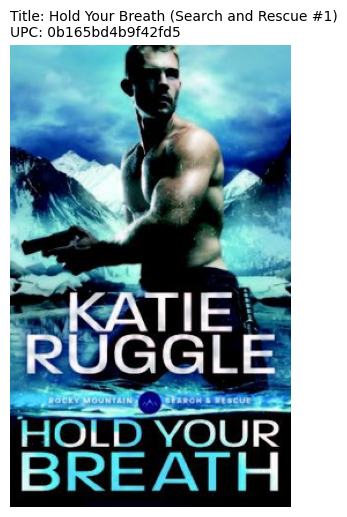

In [1]:
import os
import duckdb
from pymilvus import connections, Collection, utility
import matplotlib.pyplot as plt
from PIL import Image

# -----------------
# Global Constants
# -----------------
MILVUS_COLLECTION_NAME = 'book_images_vectors'
DUCKDB_DB_FILE = 'book_data.duckdb'
IMAGES_DIR = 'data/images'

def get_book_data_by_filename(filename: str):
    """
    이미지 파일 이름을 사용하여 해당 책의 메타데이터 및 벡터 정보를 조회합니다.
    
    Args:
        filename (str): 검색할 이미지 파일 이름 (예: '0ab4b35dcffcffd1.jpg').
        
    Returns:
        dict: 조회된 메타데이터 및 벡터 정보.
              데이터가 없으면 None을 반환합니다.
    """
    duckdb_con = None
    milvus_collection = None
    
    try:
        # 1. DuckDB에서 이미지 경로로 메타데이터 조회
        duckdb_con = duckdb.connect(database=DUCKDB_DB_FILE, read_only=True)
        image_path_query = os.path.join(IMAGES_DIR, filename)
        
        # 파일 이름에서 확장자를 제거하여 UPC로 사용
        upc_from_filename = os.path.splitext(filename)[0]

        query = f"SELECT * FROM book_metadata WHERE upc = '{upc_from_filename}';"
        result = duckdb_con.execute(query).fetchone()

        if not result:
            print(f"❌ DuckDB에서 '{filename}'에 대한 메타데이터를 찾을 수 없습니다.")
            return None
            
        columns = [desc[0] for desc in duckdb_con.description]
        book_data = dict(zip(columns, result))
        print(f"✅ DuckDB에서 메타데이터 조회 완료: {book_data.get('title')}")

        # 2. Milvus에서 UPC로 벡터 정보 조회
        connections.connect("default", host="localhost", port="19530")
        collection = Collection(MILVUS_COLLECTION_NAME)
        collection.load()
        
        vector_query = f"id == '{book_data.get('upc')}'"
        milvus_results = collection.query(
            expr=vector_query,
            output_fields=["vector"],
            limit=1
        )
        
        if milvus_results:
            book_data['vector'] = milvus_results[0]['vector']
            print(f"✅ Milvus에서 벡터 정보 조회 완료.")
        else:
            book_data['vector'] = None
            print(f"❌ Milvus에서 UPC '{book_data.get('upc')}'에 대한 벡터를 찾을 수 없습니다.")

        return book_data

    except Exception as e:
        print(f"데이터 조회 중 오류 발생: {e}")
        return None
    finally:
        if duckdb_con:
            duckdb_con.close()
        try:
            connections.disconnect("default")
        except Exception:
            pass

def display_book_data(book_data: dict):
    """
    조회된 책 데이터를 출력하고 이미지를 시각화합니다.
    """
    if not book_data:
        print("조회할 데이터가 없습니다.")
        return

    print("\n--- 조회된 책 정보 ---")
    print(f"제목: {book_data.get('title')}")
    print(f"UPC: {book_data.get('upc')}")
    print(f"가격: ${book_data.get('price')}")
    print(f"이미지 경로: {book_data.get('image_path')}")
    print(f"벡터(일부): {book_data.get('vector', [])[:5]} ...")

    image_path = book_data.get('image_path')
    if image_path and os.path.exists(image_path):
        try:
            img = Image.open(image_path)
            fig, ax = plt.subplots(figsize=(6, 6))
            ax.imshow(img)
            ax.set_title(f"Title: {book_data.get('title')}\nUPC: {book_data.get('upc')}", loc='left', fontsize=10)
            ax.axis('off')
            plt.show()
        except Exception as e:
            print(f"❌ 이미지 시각화 중 오류 발생: {e}")
    else:
        print(f"❌ 이미지 파일이 없거나 경로가 올바르지 않습니다: {image_path}")

# -----------------
# Main 실행 부분 (테스트용)
# -----------------
if __name__ == '__main__':
    # 예시 파일 이름으로 함수 호출
    test_filename = "0b165bd4b9f42fd5.jpg"
    book_info = get_book_data_by_filename(test_filename)
    if book_info:
        display_book_data(book_info)